In [1]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv('wineQualityReds.csv',index_col=0)

In [3]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
### Elbow method
ks=range(1,8)
inertia=[]

In [6]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

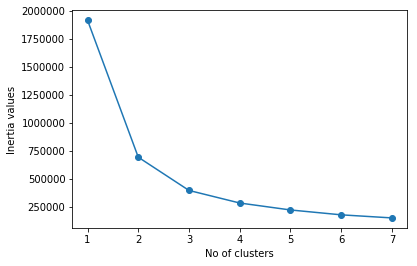

In [7]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [8]:
models=KMeans(n_clusters=4,random_state=42)
models.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [9]:
labels=models.predict(data)
labels

array([0, 1, 2, ..., 2, 2, 2])

In [10]:
# Finding the centroids
centroids=models.cluster_centers_
#centroids

In [11]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
centroid_x=centroids[:,2]
centroid_y=centroids[:,10]


In [13]:
xs=data.iloc[:,2]
ys=data.iloc[:,10]

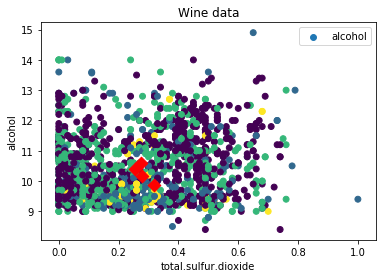

In [14]:
#plot the centroids with centroid location
import matplotlib.pyplot as plt
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.title('Wine data')
plt.xlabel('total.sulfur.dioxide')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [15]:
#sns.heatmap(data,annot=True)
#plt.show()

In [16]:
x=data.iloc[:,[2,10]].values

In [17]:
## finding the centroids
#x[labels==0,0]


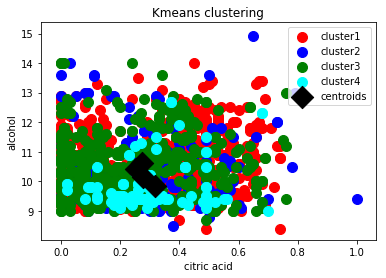

In [18]:
plt.scatter(x[labels==0,0],x[labels==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[labels==3,0],x[labels==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(models.cluster_centers_[:,2],models.cluster_centers_[:,10],s=250,c='black',marker='D',label='centroids')
plt.title('Kmeans clustering')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [19]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch

Text(0,0.5,'alcohol')

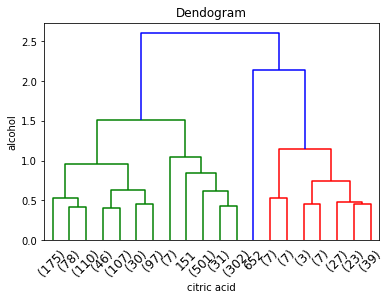

In [20]:
dendrogram=sch.dendrogram(sch.linkage(x,method='average'),orientation='top',truncate_mode='lastp',p=20,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('citric acid')
plt.ylabel('alcohol')

In [21]:
model_h=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [22]:
model_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [23]:
Hc = model_h.fit_predict(x)

In [24]:
Hc

array([2, 4, 4, ..., 0, 4, 0], dtype=int64)

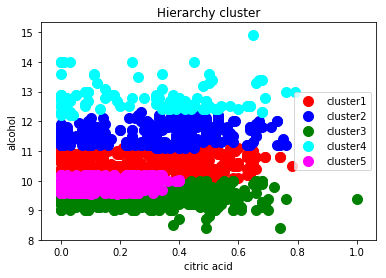

In [25]:
plt.scatter(x[Hc==0,0],x[Hc==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[Hc==1,0],x[Hc==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[Hc==2,0],x[Hc==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[Hc==3,0],x[Hc==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(x[Hc==4,0],x[Hc==4,1],s=100, c='magenta',label='cluster5')
plt.title('Hierarchy cluster')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.legend()
plt.show()

# PCA

In [26]:
quality=np.array(data['quality'])

In [27]:
quality

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [35]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
outcome=np.where(data.quality>5,1,0)

In [29]:
data['outcome']=outcome

In [30]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,outcome
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [36]:
x=data.iloc[:,0:11].values
y=data.iloc[:,12].values

In [37]:
#find train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [38]:
#apply standard scaler
sc=StandardScaler()
xtrain=sc.fit_transform(x_train)
xtest=sc.transform(x_test)

In [41]:
# logistic regression
lr=LogisticRegression()
model_lr=lr.fit(xtrain,y_train)
pred=lr.predict(xtest)
accuracy_score(y_test,pred)*100

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


70.3125

In [42]:
####decision Tree
model=DecisionTreeClassifier(criterion = 'entropy',random_state=123)
model.fit(xtrain,y_train)
ypred=model.predict(xtest)
accuracy_sc=metrics.accuracy_score(y_test,ypred)
accuracy_sc

0.74375

In [43]:
##### Random forest
model_rf=RandomForestClassifier(random_state=123)
model_rf.fit(xtrain,y_train)
prede=model_rf.predict(xtest)
acc_sc=metrics.accuracy_score(y_test,prede)
acc_sc

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.76875

In [51]:
### PCA
pc=PCA(n_components=2)
xtrain=pc.fit_transform(x_train)
xtest=pc.transform(x_test)
expvariance=pc.explained_variance_ratio_

In [52]:
expvariance

array([0.94459587, 0.0503565 ])

In [53]:

lr.fit(xtrain,y_train)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
pred1=lr.predict(xtest)
accuracy_score(y_test,pred)

0.703125